In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [2]:
class LoanState(TypedDict):
    income: float
    age: int
    credit_score: int
    eligible: bool

In [4]:
# Step 2: Define node functions
def check_age(state: LoanState) -> LoanState:
    state['eligible'] = state['age'] >= 21
    return state

def check_income(state: LoanState) -> LoanState:
    if not state['eligible']:
        return state  # Skip further checks if age fails
    state['eligible'] = state['income'] >= 50000
    return state

def check_credit_score(state: LoanState) -> LoanState:
    if not state['eligible']:
        return state  # Skip further checks if income fails
    state['eligible'] = state['credit_score'] >= 700
    return state


In [5]:
# Step 3: Define your graph and add nodes
graph = StateGraph(LoanState)
graph.add_node('check_age', check_age)
graph.add_node('check_income', check_income)
graph.add_node('check_credit_score', check_credit_score)

In [6]:
# Step 4: Add edges for workflow order
graph.add_edge(START, 'check_age')
graph.add_edge('check_age', 'check_income')
graph.add_edge('check_income', 'check_credit_score')
graph.add_edge('check_credit_score', END)


In [7]:
# Step 5: Compile the graph into a runnable workflow
workflow = graph.compile()

In [10]:
initial_state = {'income': 60000, 'age': 25, 'credit_score': 720, 'eligible': True}
result = workflow.invoke(initial_state)

print(result)

{'income': 60000, 'age': 25, 'credit_score': 720, 'eligible': True}


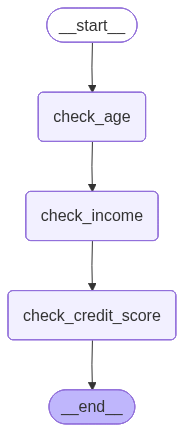

In [11]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())